In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [3]:
data = load_iris()

In [4]:
type(data)

sklearn.utils.Bunch

In [5]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [7]:
df.head ()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
df["species"] = data.target

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
df["formatted_species"] = df.species.replace({0: "setisa", 1: "versicolor", 2: "virginica"})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,formatted_species
0,5.1,3.5,1.4,0.2,0,setisa
1,4.9,3.0,1.4,0.2,0,setisa
2,4.7,3.2,1.3,0.2,0,setisa
3,4.6,3.1,1.5,0.2,0,setisa
4,5.0,3.6,1.4,0.2,0,setisa


In [12]:
df.drop("species", axis = 1, inplace = True)

In [13]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),formatted_species
0,5.1,3.5,1.4,0.2,setisa
1,4.9,3.0,1.4,0.2,setisa
2,4.7,3.2,1.3,0.2,setisa
3,4.6,3.1,1.5,0.2,setisa
4,5.0,3.6,1.4,0.2,setisa


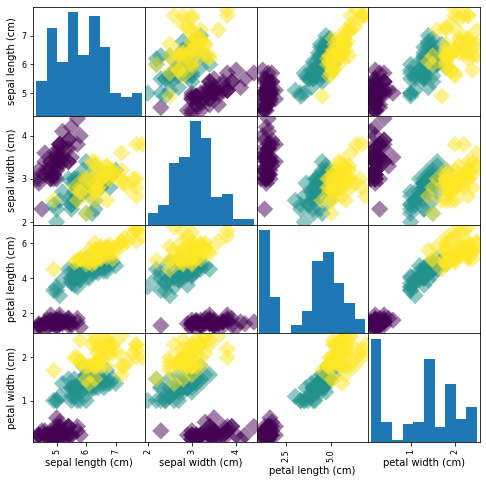

In [15]:
_ = pd.plotting.scatter_matrix(df, c=data.target, figsize = [8,8], marker = "D",s=150)

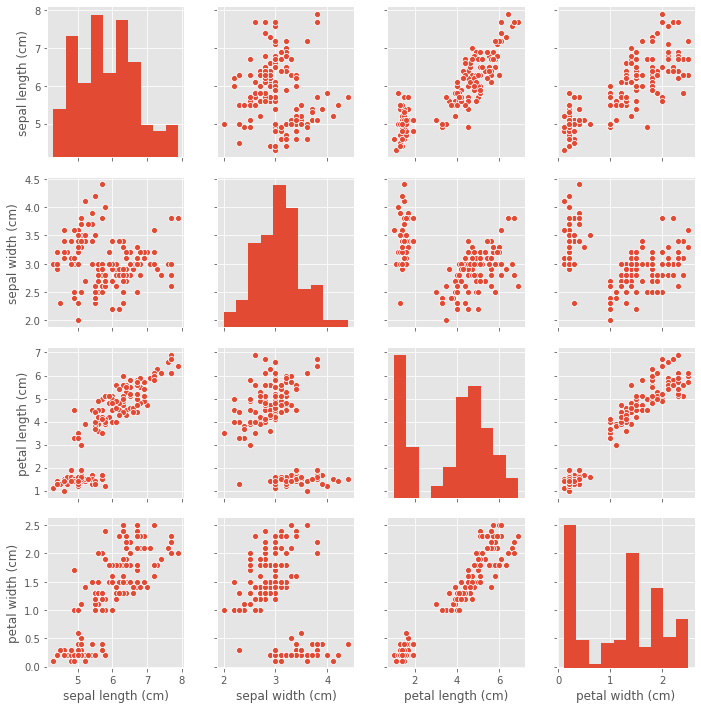

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
sns.pairplot(df)

In [18]:
# KNN firstly creates the decision boundary

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [21]:
df["species"] = data.target

In [22]:
df.drop("formatted_species", axis = 1, inplace=True)

In [23]:
# Splititng data
X = df.drop("species", axis = 1)
y = df["species"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, random_state = 24)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score
print("The Accuacy Score is {}".format( accuracy_score(y_test, y_pred)*100))

The Accuacy Score is 96.66666666666667


In [30]:
knn.score(X_test, y_test)

0.9666666666666667